In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [2]:
import pandas_profiling as pp

## Import new dataset

In [3]:
data_train = pd.read_csv("SalaryData_Train.csv")
data_test = pd.read_csv("SalaryData_Test.csv")
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data_train.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
data_train.describe() #capital gain and capital loss are not good predictors

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='workclass', ylabel='count'>

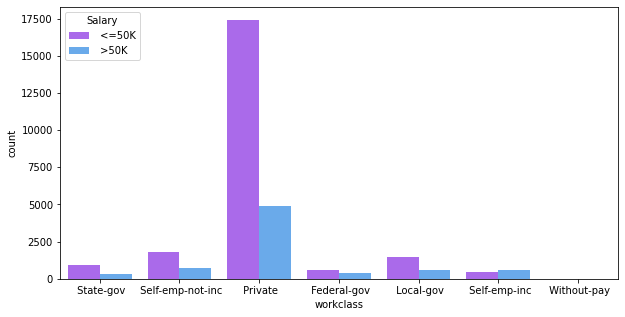

In [6]:
dims = (10,5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(ax = ax, data=data_train,x='workclass',hue='Salary',palette='cool_r')

<AxesSubplot:xlabel='occupation', ylabel='count'>

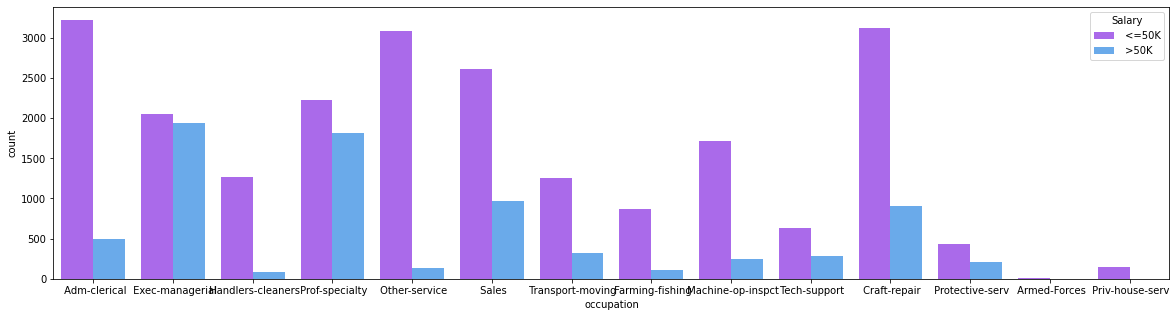

In [7]:
dims = (20,5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(data=data_train,x='occupation',hue='Salary',palette='cool_r')

In [8]:
data_train.Salary.value_counts() #Data is highly biased

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [9]:
data_test.Salary.value_counts() #Data is highly biased

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [10]:
data_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

## Visualisation EDA

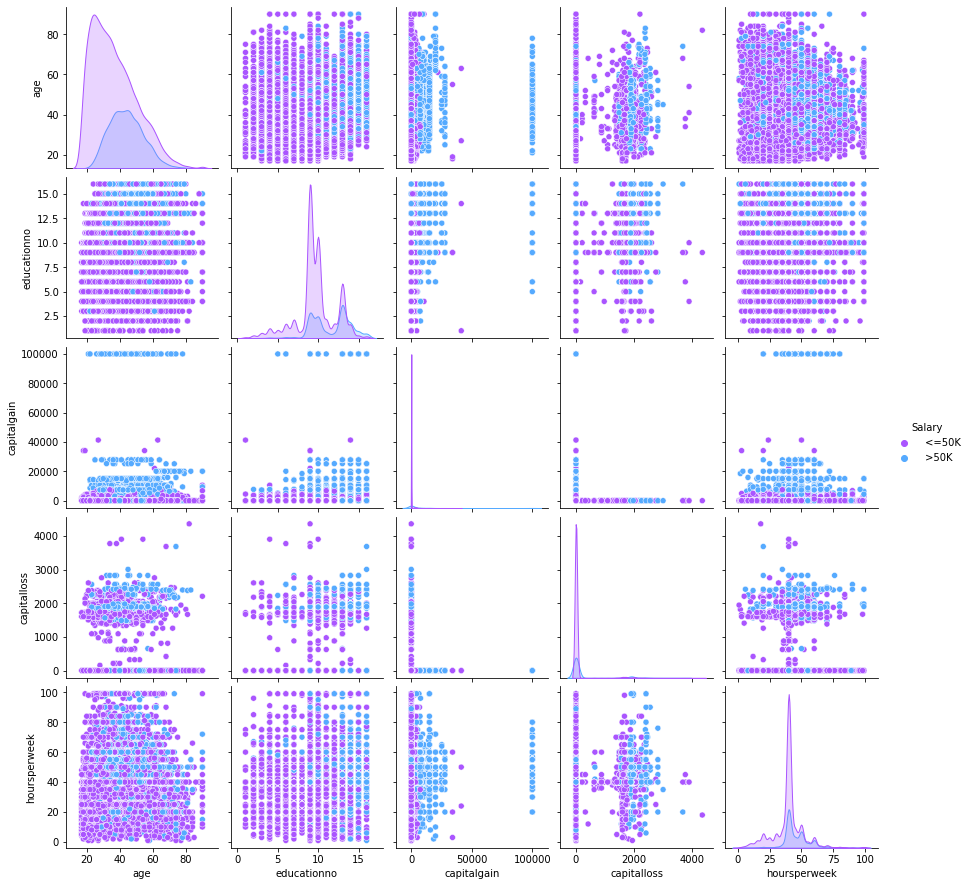

In [11]:
sns.pairplot(data_train,hue='Salary',palette='cool_r')

## Feature Engineering

- All the features in the dataset are relevant and can be used for model training.
- There a number of categorical values onto which label encoding can be performed. 
- capital gain and capital loss add lots of variability in the data and hence removing them would be a good move.

In [12]:
labels = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex','native', 'Salary']
dftrain = data_train.copy()
dftest = data_test.copy()
label_encoder = preprocessing.LabelEncoder()
for x in labels:
    dftrain[x] = label_encoder.fit_transform(dftrain[x])
    dftest[x] = label_encoder.fit_transform(dftest[x])

In [13]:
dftrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


### Train test split 
we dont need to split since we have a seperate data set on which testing can be done

In [14]:
X_train = dftrain.iloc[:,:-1]
y_train = dftrain['Salary']

In [15]:
X_test = dftest.iloc[:,:-1]
y_test = dftest['Salary']

## Naive Bayes Classifier
### Default Parameters - MultinomialNB

In [16]:
model_mb = MB()
model_mb.fit(X_train,y_train)

MultinomialNB()

### Default Parameters - GaussianlNB

In [17]:
model_gb = GB()
model_gb.fit(X_train,y_train)

GaussianNB()

### Evaluation

In [18]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [19]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)

MultinomialNB
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


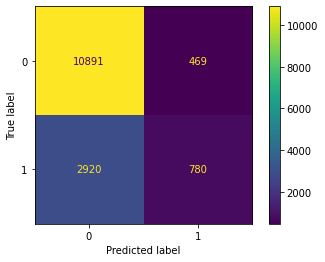

In [20]:
#MultinomialNB Evaluation
print('MultinomialNB')
report(model_mb) #model has high inbuilt bias

GaussianNB
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


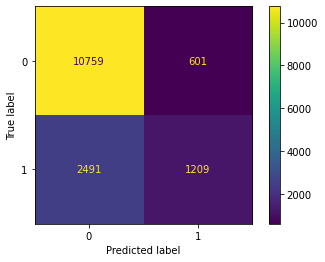

In [21]:
#GaussianNB Evaluation
print('GaussianNB')
report(model_gb) #model has high inbuilt bias but better results as compared to multinomial

### K-Fold validation

In [22]:
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results = cross_val_score(model_mb, X_train, y_train, cv=kfold)
print(results.mean())

0.7729185807392064


In [23]:
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results = cross_val_score(model_gb, X_train, y_train, cv=kfold)
print(results.mean())

0.7953978735881289


## Bias Removal from training dataset

In [30]:
from imblearn.combine import SMOTETomek
from collections import Counter

#SMOTEK TECHNIQUE

#Define training dataset
X_train2 = dftrain.iloc[:,:-1]
y_train2 = dftrain['Salary']

#Count before
print(Counter(y_train2))

smt = SMOTETomek(sampling_strategy = 'auto')
X_train3, y_train3 = smt.fit_resample(X_train2, y_train2 )

#Count after
print(Counter(y_train3))


Counter({0: 22653, 1: 7508})
Counter({0: 22222, 1: 22222})


## Building Final model

We will go for the gaussian model

In [31]:
model_fnl = GB()
model_fnl.fit(X_train3,y_train3)

GaussianNB()

GaussianNB
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.68      0.45      0.55      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.69      0.71     15060
weighted avg       0.80      0.81      0.80     15060



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


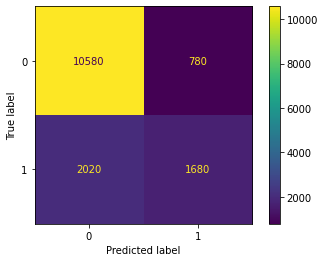

In [32]:
print('GaussianNB')
report(model_fnl) #Model performs much better after removing Bias from taining model.

In [33]:
model_fnl.predict_proba(X_test)

array([[9.99997051e-01, 2.94854854e-06],
       [7.21923041e-01, 2.78076959e-01],
       [8.45987229e-01, 1.54012771e-01],
       ...,
       [4.28506145e-01, 5.71493855e-01],
       [5.36513025e-05, 9.99946349e-01],
       [4.84084841e-01, 5.15915159e-01]])

## Conclusion

- We had tried out naive bayes classifier for our dataset. 
- Both gaussian and multinomial methodologies were tried out where the former seemed a better option.
- Initial results were very poor as the input training dataset involved a lot of built-in bias. 
- The testing dataset was also highly biased. 
- The built in bias of the training model was removed using the Smotek technique.
- The final model had a descent accuracy which could be further improved if tested on an unbiased dataset